In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# csv has all recoreded leakage instances
leakages_df=pd.read_csv('ISE_DATASET_final2.csv')
leakages_df


,website,category,reachableornot,PIIleakageornot,raw_PII,PII_type,real_encoding,encoding,method,third_party,requires_authentication
0,nytimes.com,generalnews,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,no
1,cnn.com,generalnews,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,no
2,forbes.com,generalnews,yes,yes,60201,NaN,NaN,plain,get,d.agkn.com,no
3,theguardian.com,generalnews,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
4,theguardian.com,generalnews,yes,yes,Evanston,NaN,NaN,plain,post,api.permutive.com,yes
...,...,...,...,...,...,...,...,...,...,...,...
1107,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,NaN,NaN,hashing,get,ct.pinterest.com,no
1108,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,NaN,NaN,hashing,get,www.facebook.com,no
1109,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,NaN,NaN,hashing,post,www.facebook.com,no
1110,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,NaN,NaN,hashing,get,ct.pinterest.com,no


In [6]:
# this is to get the per website metric 
df_unique_websites=leakages_df.drop_duplicates(subset=['website'])
df_unique_websites


,website,category,reachableornot,PIIleakageornot,raw_PII,PII_type,real_encoding,encoding,method,third_party,requires_authentication
0,nytimes.com,generalnews,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,no
1,cnn.com,generalnews,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,no
2,forbes.com,generalnews,yes,yes,60201,NaN,NaN,plain,get,d.agkn.com,no
3,theguardian.com,generalnews,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
6,bbc.com,generalnews,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
...,...,...,...,...,...,...,...,...,...,...,...
1099,aircanada.com,travel,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,scitation.org,travel,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,yes
1101,sabre.com,travel,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,turo.com,travel,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,no


In [37]:
df_unique_websites.shape
df_unique_websites.index
df_unique_websites.columns

Index(['website', 'category', 'reachableornot', 'PIIleakageornot', 'raw_PII',
       'PII_type', 'real_encoding', 'encoding', 'method', 'third_party',
       'requires_authentication'],
      dtype='object')

In [40]:
df_unique_websites.iloc[1,1]
df_unique_websites.loc[:100,"category"]

0     generalnews
1     generalnews
2     generalnews
3     generalnews
6     generalnews
9     generalnews
10    generalnews
16    generalnews
27    generalnews
38    generalnews
43    generalnews
54    generalnews
65    generalnews
83    generalnews
90    generalnews
Name: category, dtype: object

In [8]:
df_unique_websites.groupby(by=['reachableornot']).size()


reachableornot
no     111
yes    202
dtype: int64

In [9]:
df_unique_websites.groupby(by=['category']).size()


category
entertainment     53
generalnews       85
onlineshopping    81
sports            40
travel            52
dtype: int64

In [10]:
df_group = df_unique_websites.groupby(by=["category", "reachableornot"])
df_group.size()


category        reachableornot
entertainment   no                25
                yes               28
generalnews     no                25
                yes               60
onlineshopping  no                30
                yes               51
sports          no                12
                yes               28
travel          no                17
                yes               35
dtype: int64

In [13]:
df_group = df_unique_websites.groupby(by="PII_type")
df_group.size()

Series([], dtype: int64)

In [46]:
df_unique_websites.memory_usage

<bound method DataFrame.memory_usage of                website     category reachableornot PIIleakageornot  \
0          nytimes.com  generalnews            yes              no   
1              cnn.com  generalnews            yes              no   
2           forbes.com  generalnews            yes             yes   
3      theguardian.com  generalnews            yes             yes   
6              bbc.com  generalnews            yes             yes   
...                ...          ...            ...             ...   
1099     aircanada.com       travel             no             NaN   
1100     scitation.org       travel            yes              no   
1101         sabre.com       travel             no             NaN   
1102          turo.com       travel            yes              no   
1103  fourseasons.com/       travel            yes             yes   

                                                raw_PII  PII_type  \
0                                                 

In [42]:
# we must now augment with PII_TYPE to know what was the type of data leaked 
hashes=pd.read_csv('final_hashes.csv')
hashes
df_unique_websites["raw_PII"] == 
# df_unique_websites["PII_type"] = df_unique_websites[]


,Unnamed: 0,plaintext,md5,sha224,sha256,sha1,sha512,base64,base32,md4,...,sha1ofbase32,sha1ofbase16,sha256ofmd5ofbase64,sha256ofmd5ofsha224,sha256ofmd5ofsha1,sha256ofsha1ofmd5,md5ofsha256ofbase64,md5ofsha1ofsha256,md5ofsha256ofsha1,md5ofsha256ofsha224
0,roger,roger,b911af807c2df88d671bd7004c54c1c2,3af60bdfcdb37e3f879091a533f2893fd524c8c0e85802...,4387134784cf3aa4245b7fcf4ac045d0a449524e98ba5d...,a61a1add71dadc74037ae5e44ee30713db9a7451,7d49ee4097396fa02e138d4559ce68d4243bfc834256bb...,cm9nZX,OJXWOZ,141080474b81fa4c82def9e1ecf496fa,...,b59cc3e2b7eeb4d615035455814c1ac31f9fb196,d6a85b5fcf02f9dcde57daf04912606623b2e92f,c64825656c77a53adbf9297459033086c7be823b260caf...,a4171c0621457b48b581a931d38ca4bc83f0d8340089ca...,80da5e7c5aa0b2b948fe4ea4bb513880d0b56fa09900b9...,5e85d91e772f16a2c75f68d8b3edab4f7c74df5c8a8569...,34455fde30a32c0b6b2008d0704d82b6,a8d8885e84fe8a49d9633d51f3f17efb,e841614e6aabda6d1b50bf56c5efe88e,8a6740ee8c03f510099547dc87e7f55c
1,nadal,nadal,2bd729496c8ad6f8608b878251acea44,52c76282a9e98e8d3ff6f1a2a5a50213190b2497a6aa28...,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,e30eb2974c9e4bd81ac390b347b23b253fbeab85,438dc88152a7512c985c7bdca4f65e7fd127327696d640...,bmFkYW,NZQWIY,2560503eabd7dbafd8d8d90cf46b1f75,...,ede935076c698f550fc44493f86be4978a51ff06,55cc28e1af73af9b5f03c2530428de0495ebf447,dbb3c6a07200557ce9f9e26f578bb7b0de4c95a2473d27...,338c8e949e008e6608a596933271f1fdc879bae368e416...,d252899a61850407c5594ede4aa455cda755a2a2abbabb...,590feda627ab17c9eb14857be9279c518e4be74c178f99...,e6cbc9d5d97d16a220f77bb85b807f65,28912551c70804161ad9df6d869f030b,b489cbf2adb84ab21f71aee592bc9be3,74fed02142df49bcfc7b8f79154be9fd
2,rogernadal,rogernadal,4a0ca51e3890ddb31ac03bd242068a24,a64b65963cd7d0cde659d4947ef054d9b6172987b46443...,65230662bf225a90fbbc3857600d54b3cd08242b3acacb...,29ea58ef86e44c31b16f1985d6724ef9a563ddc7,29d9ab08e76a4baa27dd0fb93da76be6d81cc53a823cd1...,cm9nZXJuYWRhbA,OJXWOZLSNZQWIY,6c8fb9a6ae665a41f0dd7e114d310902,...,fc55479b4a850c6b992a0675754164ba5bdf563e,8b33142f183acedcdb54db36a2ecd75cd0ffc11d,2d2343daa84248eeb8d799bb988c48fc88e03c57d78e07...,bacd94277de9790eef53364ea1500d1fb16f392d014ccc...,7b81111b95f3c6a7533b744b73925f1a29ec2f8560ffce...,5aa5c7d7145f113bf837de15f99b6d868204c741be1593...,05ffdf56df393113bafac17cc6588ce1,155cde9369a9ed014c6393d8f0eaad31,97e189ce1ff0d7e7118276a56dc68193,8bc3a1b040b812f8d44d978dcee46b93
3,rogernadal322,rogernadal322,f095ddabfab9deace8bfd6e6f56c48db,d74582da54a6094b4d3f126070045d05fb666a1ce7227a...,ede5ea1edb7a382f9bbff28a040d7072a5c64249a3791b...,240027d3093163e23f4089d61999de6b7223322e,e8fb7e6dddd79edca20cc26f5a2bec52f64801b600cecc...,cm9nZXJuYWRhbDMyMg,OJXWOZLSNZQWIYLMGMZDE=,56e5ec7d396f284195b6f31b3e8def0e,...,df9550495b535a3c1725154ff89224af96c71df6,ebae08cea3cf9218a3f0312ccbd8d40fe0702a1c,ad234d635c1688a9757d13b48e20169df9215666851623...,63d3f33d9cc944bbccec08b7cefc9cee5a2afbedbd3eaf...,f10cfb947ed3590f484425a639d50f630d0670618dcb36...,7a0089b6906657d032fe236cd8e934e101ba7d4ac0678a...,92736e053b80e7cd05d80b05b239fdbb,c8cfd27cd447185b33007979164912ef,8308c6994c1de386919bf772100ade95,98c9a759ae1a9f08d4f2ccdd87c9bdab
4,rogernadal322@gmail.com,rogernadal322@gmail.com,b47b636ac3fcb606572fe960f38b703f,25c0e97bad9d5e9bd0aa1cc68345b73d7a3d5ffa390695...,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,b4607c2cd5ad9662de56c4605e5c1d165e949332,af80d0a132dae7bed5ebbc2455a0cf7e59d06890d9a47b...,cm9nZXJuYWRhbDMyMkBnbWFpbC5jb2,OJXWOZLSNZQWIYLMGMZDEQDHNVQWS3BOMNXW2=,ffe31811ca93df22cf66dc0d0c6f6b18,...,cae986b97b92deebf37ea23c88202532451ff167,40b0bdce702393be43172418d6cf63ae8ebbaea8,da9e171b99ecf360c08a10ae3f15eeb9c7150e8c7f8357...,0aa975af2d1d71dc74e7fab0f93fdfc7337f32bf9c308b...,e99da2afa2b079a160b2d93bfdb6f877a273e151687754...,0346505f68205cfda99325bdbcc57e39709f966a8f51a8...,aa939acd3491e7d18b712d53ed71cc48,2165348f84260c3371b9a1007f9642e3,0e601bccfb7d7aaf2e48c24bea29a5c1,f16879c721be377ba68da216983d92bb
5,123Andy#!000,123Andy#!000,822e97fc72e80d9059e6074b67394f9c,589c4346d1

In [ ]:
df_reachable=df_unique_websites[df_unique_websites['reachable or not']=='yes']
print("number of websites_reachable",df_reachable.shape)
total_reachable=df_reachable.shape[0]
df_reachable_new=df_reachable.groupby(['category'])[['category']].count().rename(columns={'category':'count'})
df_reachable_new

number of websites_reachable (201, 11)


,count
category,
entertainment,27
general news,60
onlineshopping,51
sports,28
travel,35


In [ ]:
df_pii_leakage=df_reachable[df_reachable['PII leakage or not']=='yes']
# df_pii_leakage.groupby(['category'])['category'].count()
# df_pii_leakage[['website','category']].to_csv('leaking_websites.csv')
df_pii_leakage

,website,category,reachable or not,PII leakage or not,raw_PII,PII_type,real_encoding,encoding,method,third_party,requires_authentication
18,forbes.com,general news,yes,yes,60201,NaN,NaN,plain,get,d.agkn.com,no
19,theguardian.com,general news,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
22,bbc.com,general news,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
27,wsj.com/,general news,yes,yes,b47b636ac3fcb606572fe960f38b703f,NaN,NaN,hashing,get,api.rlcdn.com,google_auth
34,dailymail.co.uk/,general news,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
...,...,...,...,...,...,...,...,...,...,...,...
5150,travelocity.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,NaN,NaN,hashing,get,dpm.demdex.net,no
5153,theculturetrip.com/,travel,yes,yes,roger,NaN,NaN,hashing,post,rs.fullstory.com,no
5162,mountain.com/,travel,yes,yes,roger,NaN,NaN,hashing,post,api-iam.intercom.io,no
5184,wyndhamhotels.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,NaN,NaN,hashing,get,www.facebook.com,no


In [18]:
hashes=pd.read_csv('final_hashes.csv')
hashes


,Unnamed: 0,plaintext,md5,sha224,sha256,sha1,sha512,base64,base32,md4,...,sha1ofbase32,sha1ofbase16,sha256ofmd5ofbase64,sha256ofmd5ofsha224,sha256ofmd5ofsha1,sha256ofsha1ofmd5,md5ofsha256ofbase64,md5ofsha1ofsha256,md5ofsha256ofsha1,md5ofsha256ofsha224
0,roger,roger,b911af807c2df88d671bd7004c54c1c2,3af60bdfcdb37e3f879091a533f2893fd524c8c0e85802...,4387134784cf3aa4245b7fcf4ac045d0a449524e98ba5d...,a61a1add71dadc74037ae5e44ee30713db9a7451,7d49ee4097396fa02e138d4559ce68d4243bfc834256bb...,cm9nZX,OJXWOZ,141080474b81fa4c82def9e1ecf496fa,...,b59cc3e2b7eeb4d615035455814c1ac31f9fb196,d6a85b5fcf02f9dcde57daf04912606623b2e92f,c64825656c77a53adbf9297459033086c7be823b260caf...,a4171c0621457b48b581a931d38ca4bc83f0d8340089ca...,80da5e7c5aa0b2b948fe4ea4bb513880d0b56fa09900b9...,5e85d91e772f16a2c75f68d8b3edab4f7c74df5c8a8569...,34455fde30a32c0b6b2008d0704d82b6,a8d8885e84fe8a49d9633d51f3f17efb,e841614e6aabda6d1b50bf56c5efe88e,8a6740ee8c03f510099547dc87e7f55c
1,nadal,nadal,2bd729496c8ad6f8608b878251acea44,52c76282a9e98e8d3ff6f1a2a5a50213190b2497a6aa28...,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,e30eb2974c9e4bd81ac390b347b23b253fbeab85,438dc88152a7512c985c7bdca4f65e7fd127327696d640...,bmFkYW,NZQWIY,2560503eabd7dbafd8d8d90cf46b1f75,...,ede935076c698f550fc44493f86be4978a51ff06,55cc28e1af73af9b5f03c2530428de0495ebf447,dbb3c6a07200557ce9f9e26f578bb7b0de4c95a2473d27...,338c8e949e008e6608a596933271f1fdc879bae368e416...,d252899a61850407c5594ede4aa455cda755a2a2abbabb...,590feda627ab17c9eb14857be9279c518e4be74c178f99...,e6cbc9d5d97d16a220f77bb85b807f65,28912551c70804161ad9df6d869f030b,b489cbf2adb84ab21f71aee592bc9be3,74fed02142df49bcfc7b8f79154be9fd
2,rogernadal,rogernadal,4a0ca51e3890ddb31ac03bd242068a24,a64b65963cd7d0cde659d4947ef054d9b6172987b46443...,65230662bf225a90fbbc3857600d54b3cd08242b3acacb...,29ea58ef86e44c31b16f1985d6724ef9a563ddc7,29d9ab08e76a4baa27dd0fb93da76be6d81cc53a823cd1...,cm9nZXJuYWRhbA,OJXWOZLSNZQWIY,6c8fb9a6ae665a41f0dd7e114d310902,...,fc55479b4a850c6b992a0675754164ba5bdf563e,8b33142f183acedcdb54db36a2ecd75cd0ffc11d,2d2343daa84248eeb8d799bb988c48fc88e03c57d78e07...,bacd94277de9790eef53364ea1500d1fb16f392d014ccc...,7b81111b95f3c6a7533b744b73925f1a29ec2f8560ffce...,5aa5c7d7145f113bf837de15f99b6d868204c741be1593...,05ffdf56df393113bafac17cc6588ce1,155cde9369a9ed014c6393d8f0eaad31,97e189ce1ff0d7e7118276a56dc68193,8bc3a1b040b812f8d44d978dcee46b93
3,rogernadal322,rogernadal322,f095ddabfab9deace8bfd6e6f56c48db,d74582da54a6094b4d3f126070045d05fb666a1ce7227a...,ede5ea1edb7a382f9bbff28a040d7072a5c64249a3791b...,240027d3093163e23f4089d61999de6b7223322e,e8fb7e6dddd79edca20cc26f5a2bec52f64801b600cecc...,cm9nZXJuYWRhbDMyMg,OJXWOZLSNZQWIYLMGMZDE=,56e5ec7d396f284195b6f31b3e8def0e,...,df9550495b535a3c1725154ff89224af96c71df6,ebae08cea3cf9218a3f0312ccbd8d40fe0702a1c,ad234d635c1688a9757d13b48e20169df9215666851623...,63d3f33d9cc944bbccec08b7cefc9cee5a2afbedbd3eaf...,f10cfb947ed3590f484425a639d50f630d0670618dcb36...,7a0089b6906657d032fe236cd8e934e101ba7d4ac0678a...,92736e053b80e7cd05d80b05b239fdbb,c8cfd27cd447185b33007979164912ef,8308c6994c1de386919bf772100ade95,98c9a759ae1a9f08d4f2ccdd87c9bdab
4,rogernadal322@gmail.com,rogernadal322@gmail.com,b47b636ac3fcb606572fe960f38b703f,25c0e97bad9d5e9bd0aa1cc68345b73d7a3d5ffa390695...,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,b4607c2cd5ad9662de56c4605e5c1d165e949332,af80d0a132dae7bed5ebbc2455a0cf7e59d06890d9a47b...,cm9nZXJuYWRhbDMyMkBnbWFpbC5jb2,OJXWOZLSNZQWIYLMGMZDEQDHNVQWS3BOMNXW2=,ffe31811ca93df22cf66dc0d0c6f6b18,...,cae986b97b92deebf37ea23c88202532451ff167,40b0bdce702393be43172418d6cf63ae8ebbaea8,da9e171b99ecf360c08a10ae3f15eeb9c7150e8c7f8357...,0aa975af2d1d71dc74e7fab0f93fdfc7337f32bf9c308b...,e99da2afa2b079a160b2d93bfdb6f877a273e151687754...,0346505f68205cfda99325bdbcc57e39709f966a8f51a8...,aa939acd3491e7d18b712d53ed71cc48,2165348f84260c3371b9a1007f9642e3,0e601bccfb7d7aaf2e48c24bea29a5c1,f16879c721be377ba68da216983d92bb
5,123Andy#!000,123Andy#!000,822e97fc72e80d9059e6074b67394f9c,589c4346d1

In [9]:
# df_final has all those rows where reachable and
df_final=df[(df['reachable or not']=='yes') & (df['PII leakage or not']=='yes')]
df_final

,website,category,reachable or not,PII leakage or not,raw_PII,PII_type,real_encoding,encoding,method,third_party,requires_authentication
18,forbes.com,general news,yes,yes,60201,NaN,NaN,plain,get,d.agkn.com,no
19,theguardian.com,general news,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
20,theguardian.com,general news,yes,yes,Evanston,NaN,NaN,plain,post,api.permutive.com,yes
21,theguardian.com,general news,yes,yes,Illinois,NaN,NaN,plain,post,api.permutive.com,yes
22,bbc.com,general news,yes,yes,60201,NaN,NaN,plain,post,api.permutive.com,yes
...,...,...,...,...,...,...,...,...,...,...,...
5201,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,NaN,NaN,hashing,get,ct.pinterest.com,no
5202,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,NaN,NaN,hashing,get,www.facebook.com,no
5203,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,NaN,NaN,hashing,post,www.facebook.com,no
5204,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,NaN,NaN,hashing,get,ct.pinterest.com,no


In [53]:
pd.merge(df_final, hashes,left_on="raw_PII", right_on="", how="left")

MergeError: Must pass "right_on" OR "right_index".

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [34]:
[df_final == "60201"]

[      website  category  reachable or not  PII leakage or not  raw_PII  \
 18      False     False             False               False     True   
 19      False     False             False               False     True   
 20      False     False             False               False    False   
 21      False     False             False               False    False   
 22      False     False             False               False     True   
 ...       ...       ...               ...                 ...      ...   
 5201    False     False             False               False    False   
 5202    False     False             False               False    False   
 5203    False     False             False               False    False   
 5204    False     False             False               False    False   
 5205    False     False             False               False    False   
 
       PII_type  real_encoding  encoding  method  third_party  \
 18       False          False   

In [51]:
df_final[df_final == "60201"].stack().index.to_list()

[(18, 'raw_PII'),
 (19, 'raw_PII'),
 (22, 'raw_PII'),
 (30, 'raw_PII'),
 (34, 'raw_PII'),
 (35, 'raw_PII'),
 (36, 'raw_PII'),
 (37, 'raw_PII'),
 (38, 'raw_PII'),
 (72, 'raw_PII'),
 (100, 'raw_PII'),
 (101, 'raw_PII'),
 (110, 'raw_PII'),
 (111, 'raw_PII'),
 (118, 'raw_PII'),
 (119, 'raw_PII'),
 (125, 'raw_PII'),
 (126, 'raw_PII'),
 (144, 'raw_PII'),
 (145, 'raw_PII'),
 (146, 'raw_PII'),
 (147, 'raw_PII'),
 (148, 'raw_PII'),
 (149, 'raw_PII'),
 (157, 'raw_PII'),
 (167, 'raw_PII'),
 (173, 'raw_PII'),
 (174, 'raw_PII'),
 (185, 'raw_PII'),
 (253, 'raw_PII'),
 (254, 'raw_PII'),
 (255, 'raw_PII'),
 (260, 'raw_PII'),
 (276, 'raw_PII'),
 (285, 'raw_PII'),
 (298, 'raw_PII'),
 (313, 'raw_PII'),
 (336, 'raw_PII'),
 (337, 'raw_PII'),
 (364, 'raw_PII'),
 (365, 'raw_PII'),
 (376, 'raw_PII'),
 (384, 'raw_PII'),
 (445, 'raw_PII'),
 (475, 'raw_PII'),
 (503, 'raw_PII'),
 (571, 'raw_PII'),
 (572, 'raw_PII'),
 (580, 'raw_PII'),
 (589, 'raw_PII'),
 (612, 'raw_PII'),
 (619, 'raw_PII'),
 (634, 'raw_PII'),
 (6

In [20]:
pii_type_encoding_list=[]
indices=[]
columns=[]
for pii in raw_pii_list:
    for column in hashes.columns:
        values=list(hashes[hashes[column].astype(str)==pii].index)
        if(len(values)>0):
            indices.append(values[0])
            columns.append(column)
            pii_type_encoding_list.append([column,values[0]])


In [50]:
df_final.insert(5,'encoding_type',columns)
df_final.insert(6,'PII',indices)
df_final
len(pii_type_encoding_list)

ValueError: Length of values (1550) does not match length of index (919)

In [12]:
# hashes_plaintext_list=hashes['plaintext'].tolist()
for i in raw_pii_list:
    if i not in hashes.values:
        print(i)


In [13]:
df_final

,website,category,reachable or not,PII leakage or not,raw_PII,encoding_type,PII,PII_type,real_encoding,encoding,method,third_party,requires_authentication
18,forbes.com,general news,yes,yes,60201,plaintext,60201,NaN,NaN,plain,get,d.agkn.com,no
19,theguardian.com,general news,yes,yes,60201,plaintext,60201,NaN,NaN,plain,post,api.permutive.com,yes
20,theguardian.com,general news,yes,yes,Evanston,plaintext,Evanston,NaN,NaN,plain,post,api.permutive.com,yes
21,theguardian.com,general news,yes,yes,Illinois,plaintext,Illinois,NaN,NaN,plain,post,api.permutive.com,yes
22,bbc.com,general news,yes,yes,60201,plaintext,60201,NaN,NaN,plain,post,api.permutive.com,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,sha256,nadal,NaN,NaN,hashing,get,ct.pinterest.com,no
5202,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,sha256,nadal,NaN,NaN,hashing,get,www.facebook.com,no
5203,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,rogernadal322@gmail.com,NaN,NaN,hashing,post,www.facebook.com,no
5204,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,rogernadal322@gmail.com,NaN,NaN,hashing,get,ct.pinterest.com,no


In [14]:
remove_cols=['PII_type','real_encoding','encoding']
df_final=df_final.drop(columns=remove_cols)
df_final

,website,category,reachable or not,PII leakage or not,raw_PII,encoding_type,PII,method,third_party,requires_authentication
18,forbes.com,general news,yes,yes,60201,plaintext,60201,get,d.agkn.com,no
19,theguardian.com,general news,yes,yes,60201,plaintext,60201,post,api.permutive.com,yes
20,theguardian.com,general news,yes,yes,Evanston,plaintext,Evanston,post,api.permutive.com,yes
21,theguardian.com,general news,yes,yes,Illinois,plaintext,Illinois,post,api.permutive.com,yes
22,bbc.com,general news,yes,yes,60201,plaintext,60201,post,api.permutive.com,yes
...,...,...,...,...,...,...,...,...,...,...
5201,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,sha256,nadal,get,ct.pinterest.com,no
5202,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,sha256,nadal,get,www.facebook.com,no
5203,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,rogernadal322@gmail.com,post,www.facebook.com,no
5204,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,rogernadal322@gmail.com,get,ct.pinterest.com,no


In [15]:
df_final.loc[df_final['PII'] == '123Andy#!000', 'PII'] = 'password'
df_final.loc[df_final['PII'] == '60201', 'PII'] = 'zip code'
df_final.loc[df_final['PII'] == '8729858970', 'PII'] = 'phone number'
df_final.loc[df_final['PII'] == 'Evanston', 'PII'] = 'city'
df_final.loc[df_final['PII'] == 'Illinois', 'PII'] = 'state'
df_final.loc[df_final['PII'] == 'Male', 'PII'] = 'gender'
df_final.loc[df_final['PII'] == 'nadal', 'PII'] = 'first name'
df_final.loc[df_final['PII'] == 'roger', 'PII'] = 'last name'
df_final.loc[df_final['PII'] == 'rogernadal', 'PII'] = 'full name'
df_final.loc[df_final['PII'] == 'rogernadal322', 'PII'] = 'username'
df_final.loc[df_final['PII'] == 'rogernadal322@gmail.com', 'PII'] = 'email'
df_final.loc[df_final['PII'] == 'rogernadal322@gmail.comrogernadal', 'PII'] = 'email+fullname'
df_final.groupby(['PII'])['PII'].count()
# list(df_final.columns)

PII
city               44
email             231
email+fullname      1
first name        129
full name         103
gender              1
last name         145
password           18
phone number        1
state              43
username           97
zip code          106
Name: PII, dtype: int64

In [16]:
geoinfo=['city','state','zip code']
df_final=df_final[df_final.PII.isin(geoinfo)==False]
false_third_parties=['registerdisney.go.com','www.googleapis.com','login.newscorpaustralia.com','images1.livehindustan.com','www.livehindustan.com','comedycentralstore.com','www.curbed.com'
                    ,'images.livemint.com','www.livemint.com','datahash.livemint.com','sslweb.rcs.it','inapp.rcs.it','map.mp.nbc.com','tribune.signon.trb.com','id.rambler.ru','eulogin.gedi.it',
                    'subs.prd.aws.nymetro.com','api.geekdo.com','oms.expedia.com',]
df_final=df_final[df_final.third_party.isin(false_third_parties)==False]
# pii_info=['first name','full name','last name','gender']
# df_final=df_final[df_final.PII.isin(pii_info)==False]
# x_third=df_final[['third_party']].str.split(".",expand=False)
# for i in range(len(x)):
#     x[i]=x[i][-2:]
# df_final['third_party']=x
# df_final
x=df_final['third_party'].values.tolist()
for i in range(len(x)):
    x[i]=".".join(x[i].split('.')[-2:])
x
df_final['third_party'] = (x)
df_final


,website,category,reachable or not,PII leakage or not,raw_PII,encoding_type,PII,method,third_party,requires_authentication
27,wsj.com/,general news,yes,yes,b47b636ac3fcb606572fe960f38b703f,md5,email,get,rlcdn.com,google_auth
28,wsj.com/,general news,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,email,get,rlcdn.com,google_auth
29,wsj.com/,general news,yes,yes,b4607c2cd5ad9662de56c4605e5c1d165e949332,sha1,email,get,rlcdn.com,google_auth
46,cnbc.com/,general news,yes,yes,roger,plaintext,last name,post,mparticle.com,no
47,cnbc.com/,general news,yes,yes,roger,plaintext,last name,post,mparticle.com,no
...,...,...,...,...,...,...,...,...,...,...
5201,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,sha256,first name,get,pinterest.com,no
5202,fourseasons.com/,travel,yes,yes,d25f53f62e6bbd6d63180b1048c19ec336fe6649ecdf5d...,sha256,first name,get,facebook.com,no
5203,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,email,post,facebook.com,no
5204,fourseasons.com/,travel,yes,yes,eba23eb9253d668bc24763ce39c4a3b51c5cdd8fd25b1c...,sha256,email,get,pinterest.com,no


In [17]:
#general_stats

category='general news'
df_final=df_final[df_final['category']==category]
total_reachable_new=df_reachable_new.loc[category]['count']
# total_reachable_new=total_reachable
sender_websites=df_final.drop_duplicates(subset=['website'])

receiver_websites=df_final.drop_duplicates(subset=['third_party'])

sender_and_receiver_unique=df_final.drop_duplicates(subset=['website','third_party'])

grouped_sender_and_receiver_unique=sender_and_receiver_unique.groupby('website')[['third_party']].count()

sender_leaking_to_greater_than_two=grouped_sender_and_receiver_unique[grouped_sender_and_receiver_unique['third_party']>=3]
sender_percentage_above=(sender_leaking_to_greater_than_two.shape[0]*100.0/(sender_websites.shape[0]*1.0))

print("percentage of sender sites involves in PII leakage",(sender_websites.shape[0]*100/total_reachable_new))
print("total number of sender sites involved in PII_leakage",sender_websites.shape[0])
print("total number of third party services in PII_leakage",receiver_websites.shape[0])
print("Average number of third-parties receiving PII per site",sender_and_receiver_unique.shape[0]/sender_websites.shape[0] )
print("%f%% of senders leak PII to at least 3 different third party services" % sender_percentage_above)
# print()

percentage of sender sites involves in PII leakage 70.0
total number of sender sites involved in PII_leakage 42
total number of third party services in PII_leakage 43
Average number of third-parties receiving PII per site 1.9761904761904763
26.190476% of senders leak PII to at least 3 different third party services


In [18]:
# # df_final[df_final['website']=='wsj.com/']
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')




# x=['general news','travel','sports','online shopping','entertainment']
# y=[70.0,54.2,46.4,41.1,22.2]
# # plt.barh(x, y)
 
# # for index, value in enumerate(y):
# #     plt.text(value, index,
# #              str(value))
 
# # plt.show()
# # score_series = pd.Series(y)

# # x_labels = x

# # # Plot the figure.
# # plt.figure(figsize=(12, 8))
# # fig = score_series.plot(kind='bar')
# # fig.set_xticklabels(x_labels)
# # fig.bar_label(fig.containers[0], label_type='edge')
# plt.figure(figsize = (7.2, 5))

# # making the bar chart on the data
# plt.bar(x, y,color='orange')

# # calling the function to add value labels
# addlabels(x, y)

# # giving title to the plot
# plt.title("Percentage of sites leaking PII across Categories")

# # giving X and Y labels
# plt.xlabel("Category")
# plt.ylabel("% of sites leaking PII")

# # visualizing the plot
# plt.show()

# General PII

## sender and PII

In [19]:
print("General PII")
sender_and_PII_unique=df_final.drop_duplicates(subset=['website','PII'])
print("sender and PII")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['PII'])[['PII']].count().rename(columns={'PII':'count'}).reset_index()
sender_and_PII_unique_grouped['percentage']=sender_and_PII_unique_grouped['count']*100/sender_websites.shape[0]
sender_and_PII_unique_grouped
sen_pii=sender_and_PII_unique_grouped.copy()
sen_pii

General PII
sender and PII


,PII,count,percentage
0,email,34,80.952381
1,first name,24,57.142857
2,full name,22,52.380952
3,last name,24,57.142857
4,password,6,14.285714
5,phone number,1,2.380952
6,username,19,45.238095


In [20]:
print("sender and PII combined")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['website'])[['PII']].count().rename(columns={'PII':'count'}).reset_index()
x=sender_and_PII_unique_grouped[sender_and_PII_unique_grouped['count']>1].shape[0]
print("sender and pii combined",x,x*100/sender_websites.shape[0])

sender and PII combined
sender and pii combined 26 61.904761904761905


## Receiver and PII

In [21]:
sender_and_PII_unique=df_final.drop_duplicates(subset=['third_party','PII'])
print("receiver and PII")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['PII'])[['PII']].count().rename(columns={'PII':'count'}).reset_index()
sender_and_PII_unique_grouped['percentage']=sender_and_PII_unique_grouped['count']*100/receiver_websites.shape[0]
sender_and_PII_unique_grouped
rec_pii=sender_and_PII_unique_grouped.copy()
rec_pii

receiver and PII


,PII,count,percentage
0,email,24,55.813953
1,first name,28,65.116279
2,full name,27,62.790698
3,last name,32,74.418605
4,password,4,9.302326
5,phone number,1,2.325581
6,username,24,55.813953


In [22]:
print("receiver and PII combined")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['third_party'])[['PII']].count().rename(columns={'PII':'count'}).reset_index()
x=sender_and_PII_unique_grouped[sender_and_PII_unique_grouped['count']>1].shape[0]
print("receiver and pii combined",x,x*100/receiver_websites.shape[0])

receiver and PII combined
receiver and pii combined 32 74.4186046511628


## Sender and method type

In [23]:
sender_and_PII_unique=df_final.drop_duplicates(subset=['website','method'])
print("sender and method")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['method'])[['method']].count().rename(columns={'method':'count'}).reset_index()
sender_and_PII_unique_grouped['percentage']=sender_and_PII_unique_grouped['count']*100/sender_websites.shape[0]
sender_and_PII_unique_grouped
sen_met=sender_and_PII_unique_grouped.copy()
sen_met

sender and method


,method,count,percentage
0,get,30,71.428571
1,post,29,69.047619


In [24]:
print("sender and method combined")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['website'])[['method']].count().rename(columns={'method':'count'}).reset_index()
x=sender_and_PII_unique_grouped[sender_and_PII_unique_grouped['count']>1].shape[0]
print("sender and method combined",x,x*100/sender_websites.shape[0])

sender and method combined
sender and method combined 17 40.476190476190474


## Receiver and method

In [25]:
sender_and_PII_unique=df_final.drop_duplicates(subset=['third_party','method'])
print("receiver and method")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['method'])[['method']].count().rename(columns={'method':'count'}).reset_index()
sender_and_PII_unique_grouped['percentage']=sender_and_PII_unique_grouped['count']*100/receiver_websites.shape[0]
sender_and_PII_unique_grouped
rec_met=sender_and_PII_unique_grouped.copy()
rec_met

receiver and method


,method,count,percentage
0,get,27,62.790698
1,post,23,53.488372


In [26]:
print("receiver and method combined")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['third_party'])[['method']].count().rename(columns={'method':'count'}).reset_index()
x=sender_and_PII_unique_grouped[sender_and_PII_unique_grouped['count']>1].shape[0]
print("receiver and method combined",x,x*100/receiver_websites.shape[0])

receiver and method combined
receiver and method combined 7 16.27906976744186


## Sender and Encoding

In [27]:
sender_and_PII_unique=df_final.drop_duplicates(subset=['website','encoding_type'])
print("sender and encoding")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['encoding_type'])[['encoding_type']].count().rename(columns={'encoding_type':'count'}).reset_index()
sender_and_PII_unique_grouped['percentage']=sender_and_PII_unique_grouped['count']*100/sender_websites.shape[0]
sender_and_PII_unique_grouped
sen_enc=sender_and_PII_unique_grouped.copy()
sen_enc

sender and encoding


,encoding_type,count,percentage
0,base64,5,11.904762
1,md5,12,28.571429
2,plaintext,21,50.000000
3,sha1,9,21.428571
4,sha256,29,69.047619


In [28]:
print("sender and encoding combined")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['website'])[['encoding_type']].count().rename(columns={'encoding_type':'count'}).reset_index()
x=sender_and_PII_unique_grouped[sender_and_PII_unique_grouped['count']>1].shape[0]
print("sender and encoding combined",x,x*100/sender_websites.shape[0])

sender and encoding combined
sender and encoding combined 20 47.61904761904762


## Receiver and Encoding

In [29]:
sender_and_PII_unique=df_final.drop_duplicates(subset=['third_party','encoding_type'])
print("receiver and encoding")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['encoding_type'])[['encoding_type']].count().rename(columns={'encoding_type':'count'}).reset_index()
sender_and_PII_unique_grouped['percentage']=sender_and_PII_unique_grouped['count']*100/receiver_websites.shape[0]
sender_and_PII_unique_grouped
rec_enc=sender_and_PII_unique_grouped.copy()
rec_enc

receiver and encoding


,encoding_type,count,percentage
0,base64,7,16.279070
1,md5,5,11.627907
2,plaintext,26,60.465116
3,sha1,2,4.651163
4,sha256,9,20.930233


In [30]:
print("receiver and encoding combined")
sender_and_PII_unique_grouped=sender_and_PII_unique.groupby(['third_party'])[['encoding_type']].count().rename(columns={'encoding_type':'count'}).reset_index()
x=sender_and_PII_unique_grouped[sender_and_PII_unique_grouped['count']>1].shape[0]
print("receiver and encoding combined",x,x*100/receiver_websites.shape[0])

receiver and encoding combined
receiver and encoding combined 4 9.30232558139535


# third party stats

In [31]:
sender_receiver_unique=df_final.drop_duplicates(subset=['website','third_party'])
sender_receiver_unique_grouped_third=sender_receiver_unique.groupby("third_party")[['third_party']].count().rename(columns={'third_party':'count'}).reset_index().sort_values(['count'], ascending=False)
sender_receiver_unique_grouped_third['percentage']=sender_receiver_unique_grouped_third['count']*100/receiver_websites.shape[0]
gr=sender_receiver_unique_grouped_third.head(15)
gr

,third_party,count,percentage
6,facebook.com,14,32.558140
25,rlcdn.com,10,23.255814
21,permutive.com,5,11.627907
15,loginradius.com,3,6.976744
8,gravatar.com,3,6.976744
22,piano.io,3,6.976744
34,tinypass.com,2,4.651163
33,tiktok.com,2,4.651163
31,snapchat.com,2,4.651163
26,sail-track.com,2,4.651163


NameError: name 'addlabels' is not defined

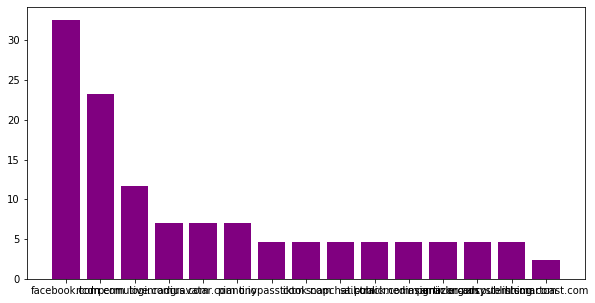

In [32]:
x=gr['third_party'].tolist()
y=gr['percentage'].tolist()
# plt.barh(x, y)
 
# for index, value in enumerate(y):
#     plt.text(value, index,
#              str(value))
 
# plt.show()
# score_series = pd.Series(y)

# x_labels = x

# # Plot the figure.
# plt.figure(figsize=(12, 8))
# fig = score_series.plot(kind='bar')
# fig.set_xticklabels(x_labels)
# fig.bar_label(fig.containers[0], label_type='edge')
plt.figure(figsize = (10, 5))

# making the bar chart on the data
plt.bar(x, y,color='purple')

# calling the function to add value labels
addlabels(x, y)

# giving title to the plot
plt.title("Top third-parties receiving PII")
plt.xticks(rotation=70)
# giving X and Y labels
plt.xlabel("Third-party")
plt.ylabel("% of sites leaking PII")

# visualizing the plot
plt.show()

In [ ]:
#first i will drop duplicates from each website, e.g amazon.com ->email->sha256->facebook should be counted once
df_pii_sen_rec_uniq=df_final.drop_duplicates(subset=['website','PII','third_party','encoding_type'])
# df_pii_sen_rec_uniq.groupby(['third_party','PII'])[['PII']].count().rename(columns={'PII':'count'}).reset_index()
df_pii_sen_rec_uniq_group=df_pii_sen_rec_uniq[['PII','third_party','encoding_type']]
df_pii_sen_rec_uniq_grouped=df_pii_sen_rec_uniq_group.groupby(['PII','third_party','encoding_type'])[['third_party']].count().rename(columns={'third_party':'count'}).reset_index()
# df_pii_sen_rec_uniq_grouped=df_pii_sen_rec_uniq_grouped[df_pii_sen_rec_uniq_grouped['PII']=='email']
new=df_pii_sen_rec_uniq_grouped[df_pii_sen_rec_uniq_grouped['count']>1].sort_values(['count'],ascending=False).sort_values(['PII']).drop_duplicates(subset=['third_party'])
new.sort_values(['count'],ascending=False)

In [ ]:
# df_rawpii_sen_rec_uni=df_final.drop_duplicates(subset=['raw_PII','website','third_party'])
# x=df_rawpii_sen_rec_uni.groupby(['third_party','raw_PII'])[['raw_PII']].count()
# x

In [ ]:
# third_parties=receiver_websites[['third_party']]
# x=third_parties['third_party'].str.split(".",n=1,expand=True)
# third_parties['domains']=x[1]
# third_parties.to_csv('third_parties.csv')

In [ ]:
x=["s","b"]
"".join(x[-2:])

In [ ]:
df_three=df_final.copy()
df_three

In [ ]:
x=df_three['third_party'].values.tolist()
for i in range(len(x)):
    x[i]=".".join(x[i].split('.')[-2:])
x
df_three['third_party'] = (x)

In [ ]:
df_three['third_party'] = (x)
df_three

In [ ]:
# df_final.to_csv('final_cleaned_dataset.csv')

In [ ]:
df_final[df_final['PII']=='password']

In [ ]:
sen_uni=df_final.drop_duplicates(subset=['website','encoding_type'])
sen_uni_gr=sen_uni.groupby(['website'])[['website']].count().rename(columns={'website':'count'}).sort_values(['count'],ascending=False)
sen_uni_gr.head(10)

In [ ]:
df_final[df_final['website']=='wired.com/']

In [ ]:
sen_pii

In [ ]:
# df2 = {'PII': 'combined', 'count': 59, 'percentage': 58.41}
# sen_pii = sen_pii.append(df2, ignore_index = True)
# sen_pii.to_csv('sen_pii.csv',index=False)
# # sen_pii.rename(columns={"count": "sender count", "percentage": "sender"})
# sen_pii

In [ ]:
# df2 = {'PII': 'combined', 'count': 58, 'percentage': 72.5}
# rec_pii = rec_pii.append(df2, ignore_index = True)
# rec_pii.to_csv('rec_pii.csv',index=False)
# rec_pii